In [1]:
import os
import glob
import scipy
import mat73
import numpy as np
import pylab as pl
import plotting as putil
import utils as util

import seaborn as sns

In [2]:
%matplotlib notebook

In [3]:
plot_style='white'
putil.set_sns_style(style=plot_style,min_fontsize=18 )
bg_color='w' if plot_style=='dark' else 'k'

In [5]:
rootdir = '/Volumes/Juliana/2p-data'

# sess ='20231215'
# acq = '20231215_fly1_LC10a-GCaMP8m-001'

# sess='examples'
# acq = 'example-data-LC10a'
# cell_color = 'magenta'

# sess ='20240104'
# acq = '20240104_fly1_splitP1-GCaMP8m_OLsimple-005'
# cell_color = 'dodgerblue'

sess = '20240531'
# acq = 'example-yak-P1-1'
acq = '20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1'
cell_color = 'dodgerblue'
# /Volumes/Julie/2p-data/20231215/processed/figures/20231215_fly1_LC10a-GCaMP8m-001'
srcdirs = sorted(glob.glob(os.path.join(rootdir, sess, 'processed','figures', '{}_TSeries*'.format(acq))), key=util.natsort)
print(srcdirs)

if plot_style == 'white':
    figdir = os.path.join( os.path.split(srcdirs[0])[0], acq , 'white')
else:
    figdir = os.path.join( os.path.split(srcdirs[0])[0], acq )
if not os.path.exists(figdir):
    os.makedirs(figdir)
print(figdir)

['/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-001', '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002', '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002a', '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002b', '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002c', '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-003', '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-010', '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-011', '/Volumes/Juliana/2p-data/20240531/processed/figures

In [6]:
srcdir = srcdirs[0]
print(srcdir)
matfile = os.path.join(srcdir, 'plotvars.mat')
assert os.path.exists(matfile)

mat = mat73.loadmat(matfile)
mdata = mat['plotdata']

/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-001


In [7]:
mdata.keys()

dict_keys(['bTime', 'dFF', 'female_angle', 'firstMotion', 'hDiff', 'iTime', 'ix_firstmotion', 'meanphase', 'meantrial_female_angle', 'meantrial_meanphase_nobas', 'meantrial_tc', 'meantrial_tc_court', 'meantrial_tc_run', 'meantrial_time', 'meantrial_zero_crossings_ix', 'smoothed_dFF', 'smoothed_hDiff', 'timecourse', 'tracking_index'])

In [8]:
for k, v in mdata.items():
    try:
        print(k, v.shape)
    except Exception as e:
        print("Issue with {}".format(k))

bTime (24798,)
dFF (3985,)
female_angle (24798,)
firstMotion ()
hDiff (24797,)
iTime (3985,)
ix_firstmotion (652,)
meanphase (41, 585)
meantrial_female_angle (586,)
meantrial_meanphase_nobas (35, 585)
meantrial_tc (35, 586)
meantrial_tc_court (586,)
meantrial_tc_run (586,)
meantrial_time (586,)
Issue with meantrial_zero_crossings_ix
smoothed_dFF (3985,)
smoothed_hDiff (24797,)
timecourse (3985,)
tracking_index (24797,)


#### behavior: stimulus pos and change in heading
plot(bTime(2:end), hDiff(1:end));
ylim([-0.5, 0.5])
ylabel('\Delta heading')
hold on;
yyaxis right
plot(bTime(2:end), female.angle(2:end))

In [9]:
 def get_start_stop_ixs(mdata, nsec_pre=0, nsec_post=20):
    first_motion_ix = int(mdata['firstMotion'])-1 # indexes into behavior traces
    t_start_motion = mdata['bTime'][first_motion_ix]
    first_motion_ix_2p = int(mdata['ix_firstmotion'][-1]-1)

    fps_behav = 1/np.mean(np.diff(mdata['bTime']))
    fps_2p = 1/np.mean(np.diff(mdata['iTime']))
    # print(fps_behav, fps_2p)
    #nsec_pre = 0
    #nsec_post = 20

    ix_start_behav = first_motion_ix - int(round(nsec_pre*fps_behav))
    ix_end_behav = first_motion_ix + int(round(nsec_post*fps_behav))
    #print(ix_start_behav, ix_end_behav)
    ix_start_2p = first_motion_ix_2p - int(round(nsec_pre*fps_2p))
    ix_end_2p = first_motion_ix_2p + int(round(nsec_post*fps_2p))
    #print(ix_start_2p, ix_end_2p)

    return ix_start_behav, ix_end_behav, ix_start_2p, ix_end_2p


In [10]:
mdata['meantrial_female_angle'].mean(axis=0) #.shape

# mdata['meantrial_tc'].mean(axis=0)

-0.006774744027303728

In [11]:
def normalize(array):
    """
    Normalizes the input array so that the minimum value is 0 and the maximum value is 1.

    Parameters:
    array (list or numpy array): The array of values to be normalized.

    Returns:
    list: A new array with the normalized values.
    """
    min_val = min(array)
    max_val = max(array)

    # If the array has only one unique value, return an array of zeros
    if min_val == max_val:
        return [0.0] * len(array)

    normalized_array = [(x - min_val) / (max_val - min_val) for x in array]
    return normalized_array

In [12]:
for i, v in enumerate(srcdirs):
    print(i, v)

0 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-001
1 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002
2 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002a
3 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002b
4 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002c
5 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-003
6 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-010
7 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-011
8 /Volumes/Juliana/2p-data/20240531/processed/figures/2024053

In [13]:
srcdir.split('-')

['/Volumes/Juliana/2p',
 'data/20240531/processed/figures/20240531_Dmel',
 'LC10a',
 'SS1',
 'GCaMP8m_f2v1_TSeries',
 '05312024',
 '1500',
 '001']

In [14]:
srcdirs

['/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-001',
 '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002',
 '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002a',
 '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002b',
 '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002c',
 '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-003',
 '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-010',
 '/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-011',
 '/Volumes/Juliana/2p-data/20240531/processed

<IPython.core.display.Javascript object>


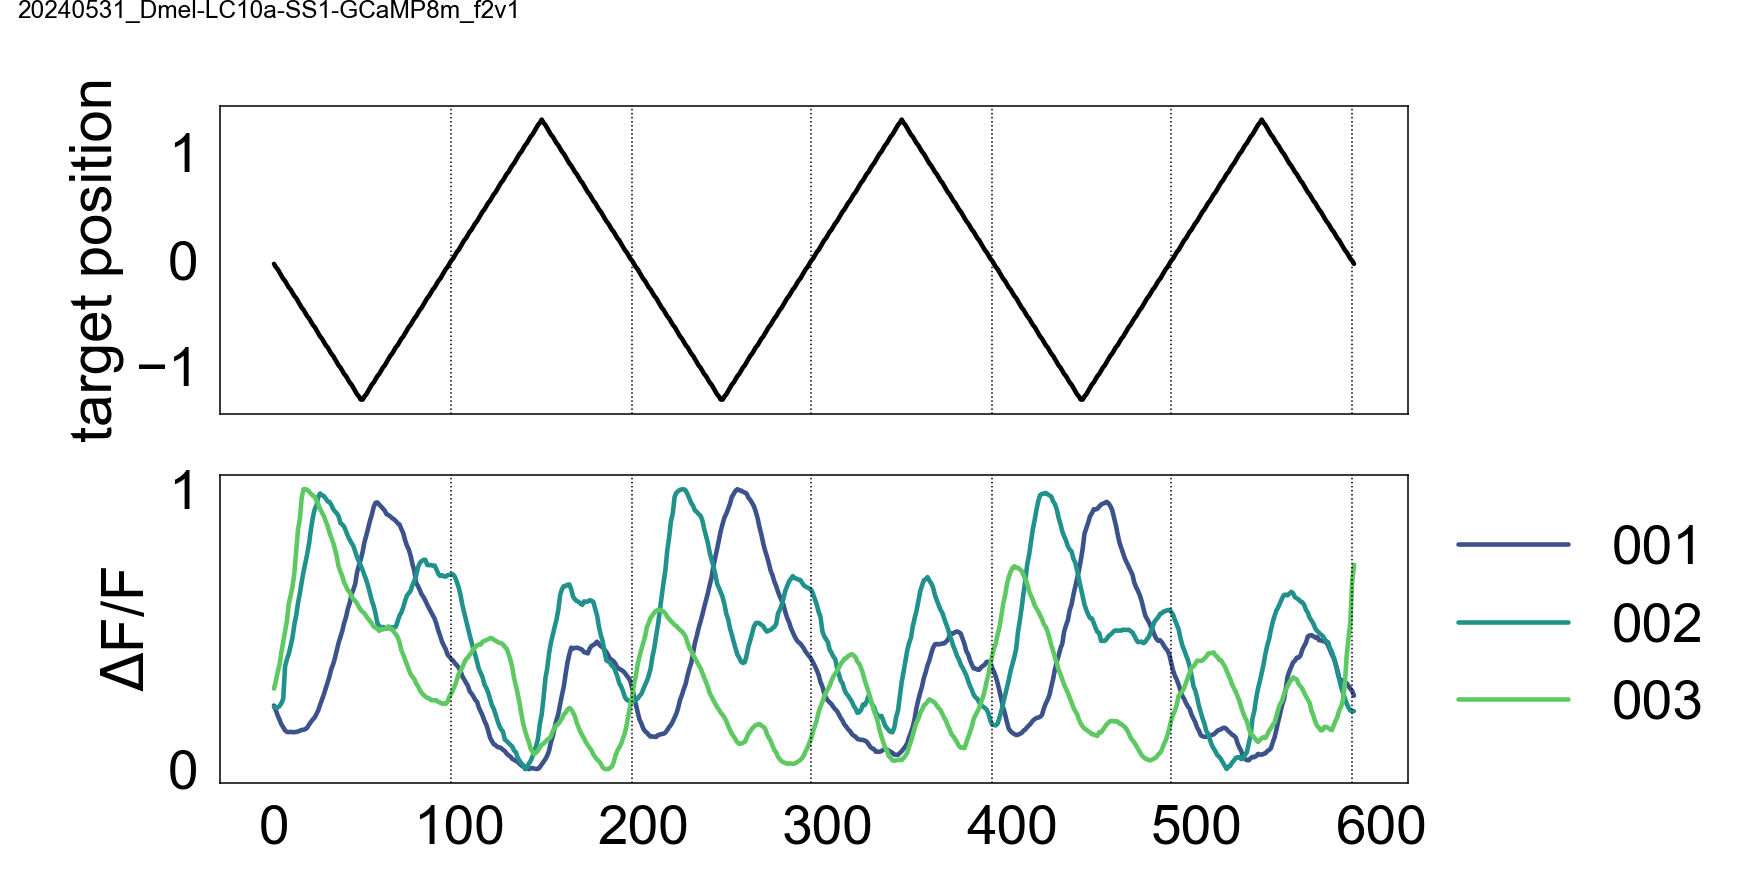

/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1/white meantrial_tc_court_files-001-002-003


In [16]:
yvar = 'meantrial_tc_court'

colors = sns.color_palette('viridis', n_colors=3)
fig, axn = pl.subplots(2, 1, sharex=True, figsize=(8,4))
ax=axn[0]
ax.set_ylabel('target position')
ax.plot(mdata['meantrial_female_angle'], bg_color)
midline_ixs = np.where(np.round(mdata['meantrial_female_angle'], 2)==-0.01)[0]
for i in midline_ixs:
    ax.axvline(i, lw=0.5, linestyle=':', color=bg_color)
    
fnums=[]
for si, srcdir in enumerate([srcdirs[0], srcdirs[1], srcdirs[5]]):
    #srcdir = srcdirs[2]
    matfile = os.path.join(srcdir, 'plotvars.mat')
    assert os.path.exists(matfile)
    mat = mat73.loadmat(matfile)
    mdata = mat['plotdata']

    if yvar == 'meantrial_tc':
        mean_tc = mdata[yvar].mean(axis=0)
    else:
        mean_tc = mdata[yvar]
    mean_tc_normed = normalize(mean_tc)
    ax=axn[1]
    ax.set_ylabel('$\Delta$F/F')
    fnum = srcdir.split('-')[-1]
    ax.plot(mean_tc_normed, color=colors[si], label=fnum)
    fnums.append(fnum)
for i in midline_ixs:
    ax.axvline(i, lw=0.5, linestyle=':', color=bg_color)
    
ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)
pl.subplots_adjust(right=0.8)

putil.label_figure(fig, acq)
figname = '{}_files-{}'.format(yvar, '-'.join(fnums))
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))

print(figdir, figname)

In [17]:
for i, v in enumerate(srcdirs):
    print(i, v)

0 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-001
1 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002
2 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002a
3 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002b
4 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-002c
5 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-003
6 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-010
7 /Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1_TSeries-05312024-1500-011
8 /Volumes/Juliana/2p-data/20240531/processed/figures/2024053

<IPython.core.display.Javascript object>


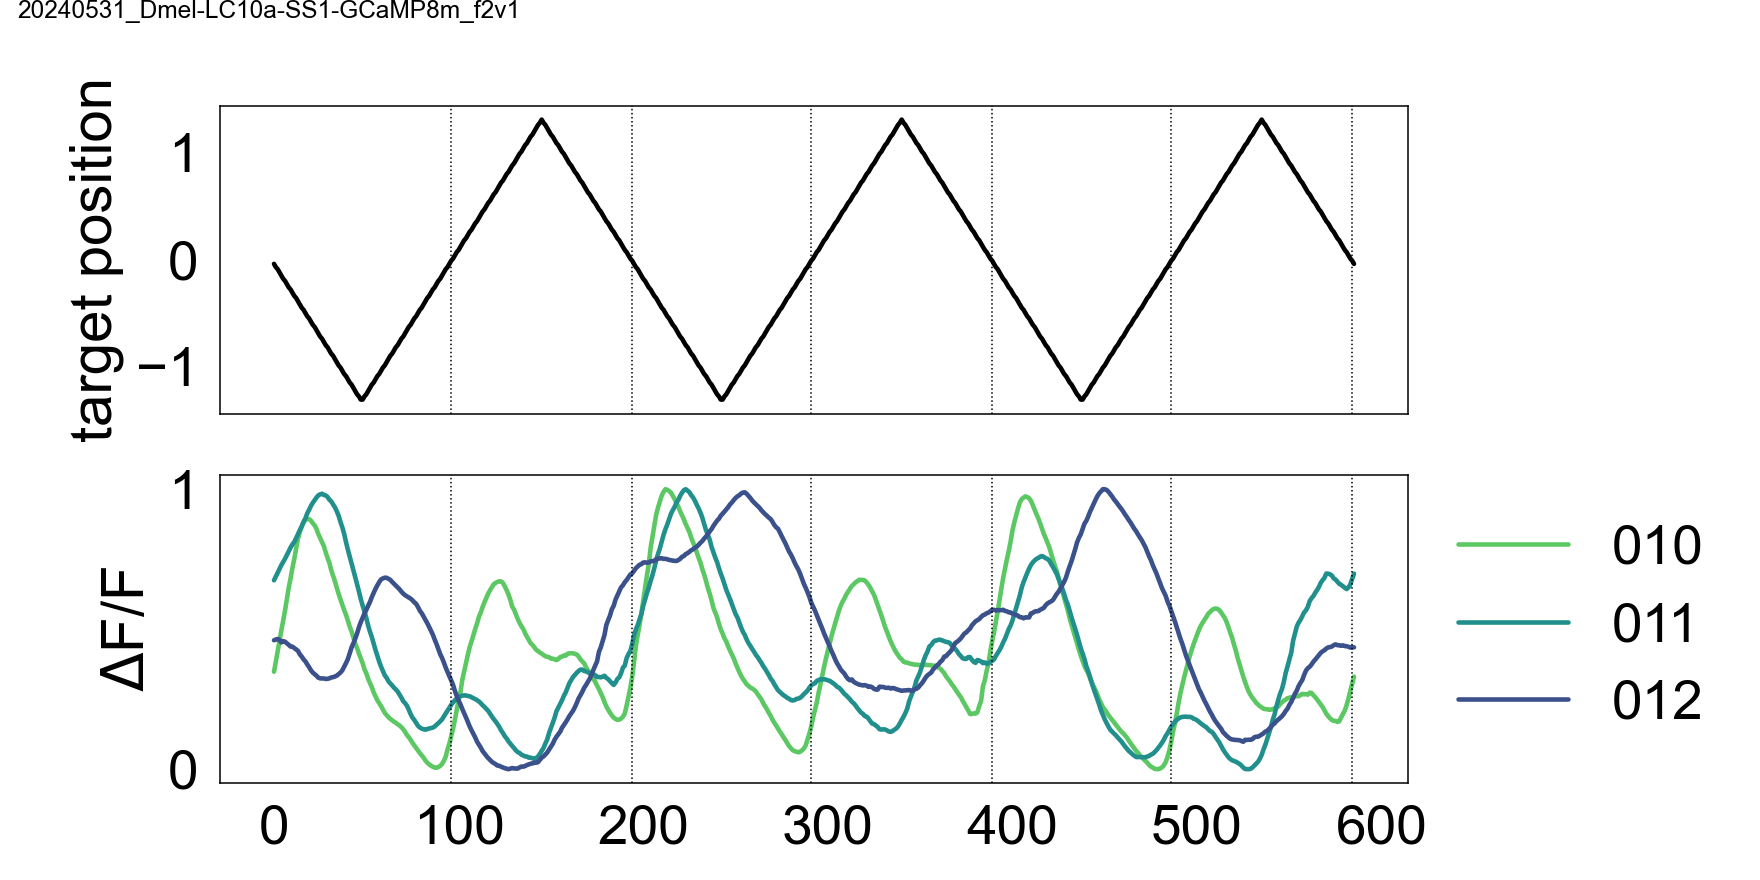

/Volumes/Juliana/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1/white meantrial_tc_files-010-011-012


In [21]:
yvar = 'meantrial_tc'

colors = sns.color_palette('viridis_r', n_colors=3)
fig, axn = pl.subplots(2, 1, sharex=True, figsize=(8,4))
ax=axn[0]
ax.set_ylabel('target position')
ax.plot(mdata['meantrial_female_angle'], bg_color)
midline_ixs = np.where(np.round(mdata['meantrial_female_angle'], 2)==-0.01)[0]
for i in midline_ixs:
    ax.axvline(i, lw=0.5, linestyle=':', color=bg_color)

fnums = []
for si, srcdir in enumerate([srcdirs[6], srcdirs[7], srcdirs[8]]):
    #srcdir = srcdirs[2]
    matfile = os.path.join(srcdir, 'plotvars.mat')
    assert os.path.exists(matfile)
    mat = mat73.loadmat(matfile)
    mdata = mat['plotdata']

    if yvar == 'meantrial_tc':
        mean_tc = mdata[yvar].mean(axis=0)        
    else:
        mean_tc = mdata[yvar]
    #normalize for visualization
    mean_tc_normed = normalize(mean_tc)
    ax=axn[1]
    ax.set_ylabel('$\Delta$F/F')
    fnum = srcdir.split('-')[-1]
    fnums.append(fnum)
    ax.plot(mean_tc_normed, color=colors[si], label=fnum)
for i in midline_ixs:
    ax.axvline(i, lw=0.5, linestyle=':', color=bg_color)
    
ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)
pl.subplots_adjust(right=0.8)

putil.label_figure(fig, acq)
figname = '{}_files-{}'.format(yvar, '-'.join(fnums))
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))

print(figdir, figname)

<IPython.core.display.Javascript object>


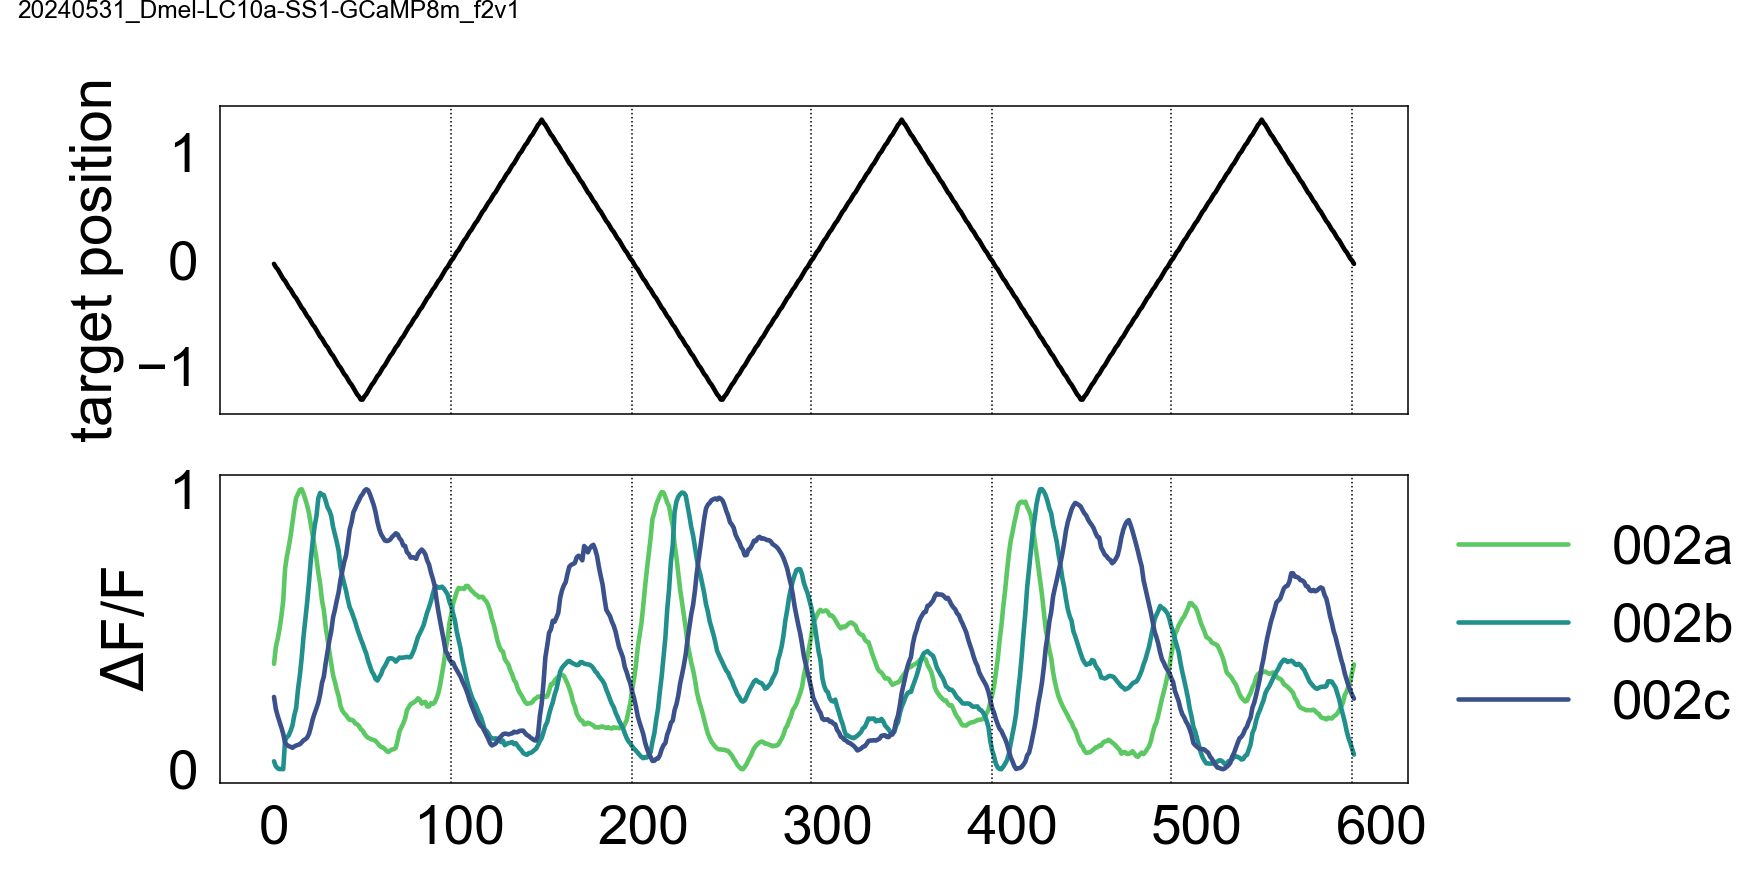

PermissionError: [Errno 13] Permission denied

In [32]:
yvar = 'meantrial_tc_court'

colors = sns.color_palette('viridis_r', n_colors=3)
fig, axn = pl.subplots(2, 1, sharex=True, figsize=(8,4))
ax=axn[0]
ax.set_ylabel('target position')
ax.plot(mdata['meantrial_female_angle'], bg_color)
midline_ixs = np.where(np.round(mdata['meantrial_female_angle'], 2)==-0.01)[0]
for i in midline_ixs:
    ax.axvline(i, lw=0.5, linestyle=':', color=bg_color)

fnums=[]
for si, srcdir in enumerate([srcdirs[2], srcdirs[3], srcdirs[4]]):
    #srcdir = srcdirs[2]
    matfile = os.path.join(srcdir, 'plotvars.mat')
    assert os.path.exists(matfile)
    mat = mat73.loadmat(matfile)
    mdata = mat['plotdata']

    if yvar == 'meantrial_tc':
        mean_tc = mdata[yvar].mean(axis=0)
    else:
        mean_tc = mdata[yvar]
    #mean_sec = mdata['meantrial_time']
    mean_tc_normed = normalize(mean_tc)
    ax=axn[1]
    ax.set_ylabel('$\Delta$F/F')
    fnum = srcdir.split('-')[-1]
    ax.plot(mean_tc_normed, color=colors[si], label=fnum)
    fnums.append(fnum)
for i in midline_ixs:
    ax.axvline(i, lw=0.5, linestyle=':', color=bg_color)
    
ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)
pl.subplots_adjust(right=0.8)

putil.label_figure(fig, acq)
figname = '{}_files-{}'.format(yvar, '-'.join(fnums))
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))
print(figdir, figname)

In [28]:
len(mdata['meantrial_time'])
#.mean(axis=0)

586

In [29]:
len(mean_tc)

586

<IPython.core.display.Javascript object>


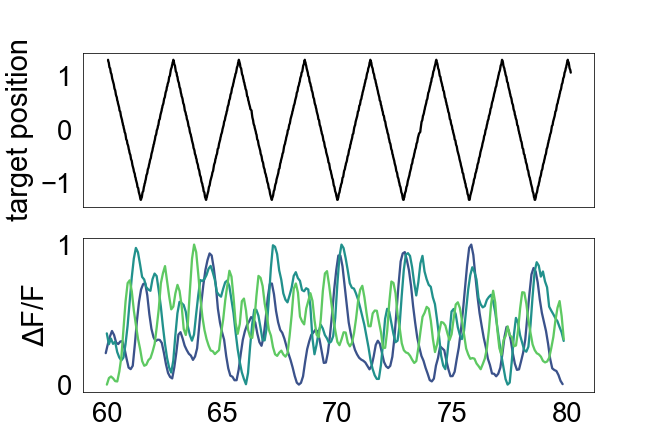

In [55]:
colors = sns.color_palette('viridis', n_colors=3)

fig, axn = pl.subplots(2, 1, sharex=True)
ax=axn[0]
ax.set_ylabel('target position')
ax.plot(mdata['bTime'][ix_start_behav+1:ix_end_behav+1], 
        mdata['female_angle'][ix_start_behav:ix_end_behav], 'k') 

for si, srcdir in enumerate([srcdirs[0], srcdirs[1], srcdirs[3]]):
    #srcdir = srcdirs[2]
    matfile = os.path.join(srcdir, 'plotvars.mat')
    assert os.path.exists(matfile)
    mat = mat73.loadmat(matfile)
    mdata = mat['plotdata']

    ix_start_behav, ix_end_behav, ix_start_2p, ix_end_2p = get_start_stop_ixs(mdata, nsec_pre=0, nsec_post=20)
    ax=axn[1]
    ax.set_ylabel('$\Delta$F/F')
    normed_trace = normalize(mdata['smoothed_dFF'][ix_start_2p:ix_end_2p])
    
    ax.plot(mdata['iTime'][ix_start_2p:ix_end_2p], 
            normed_trace, color=colors[si])


<IPython.core.display.Javascript object>


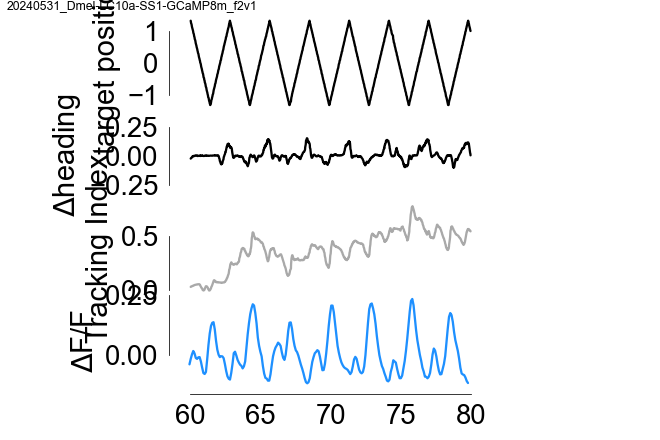

/Volumes/Julie/2p-data/20240531/processed/figures/20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1/timecourse-subset_20240531_Dmel-LC10a-SS1-GCaMP8m_f2v1.svg


In [19]:
# t_end_plot_sec = t_start_motion + 60.
# t_start_plot_sec = t_start_motion - 2
# tc_color = 'dodgerblue'
tc_color = cell_color
fig, axn = pl.subplots(4, 1, sharex=True)
ax=axn[0]
ax.set_ylabel('target position')
ax.plot(mdata['bTime'][ix_start_behav+1:ix_end_behav+1], 
        mdata['female_angle'][ix_start_behav:ix_end_behav], 'k') 
ax=axn[1]
ax.set_ylabel('$\Delta$heading')
ax.plot(mdata['bTime'][ix_start_behav+1:ix_end_behav+1], 
        mdata['smoothed_hDiff'][ix_start_behav:ix_end_behav], 'k')
ax.set_ylim([-0.4, 0.4])

ax=axn[2]
ax.set_ylabel('Tracking Index')
ax.plot(mdata['bTime'][ix_start_behav+1:ix_end_behav+1], 
        mdata['tracking_index'][ix_start_behav:ix_end_behav], 'darkgray')
ax=axn[3]
ax.set_ylabel('$\Delta$F/F')
ax.plot(mdata['iTime'][ix_start_2p:ix_end_2p], 
        mdata['smoothed_dFF'][ix_start_2p:ix_end_2p], tc_color)

for ax in axn:
    ax.set_box_aspect(0.3)
    #ax.axis('off')
pl.tight_layout()
pl.subplots_adjust(hspace=0)
sns.despine(offset=4, trim=True)

putil.label_figure(fig, acq)

figname = 'timecourse-subset_{}'.format(acq)
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(os.path.join(figdir, '{}.svg'.format(figname)))

#### plot average trial

<IPython.core.display.Javascript object>


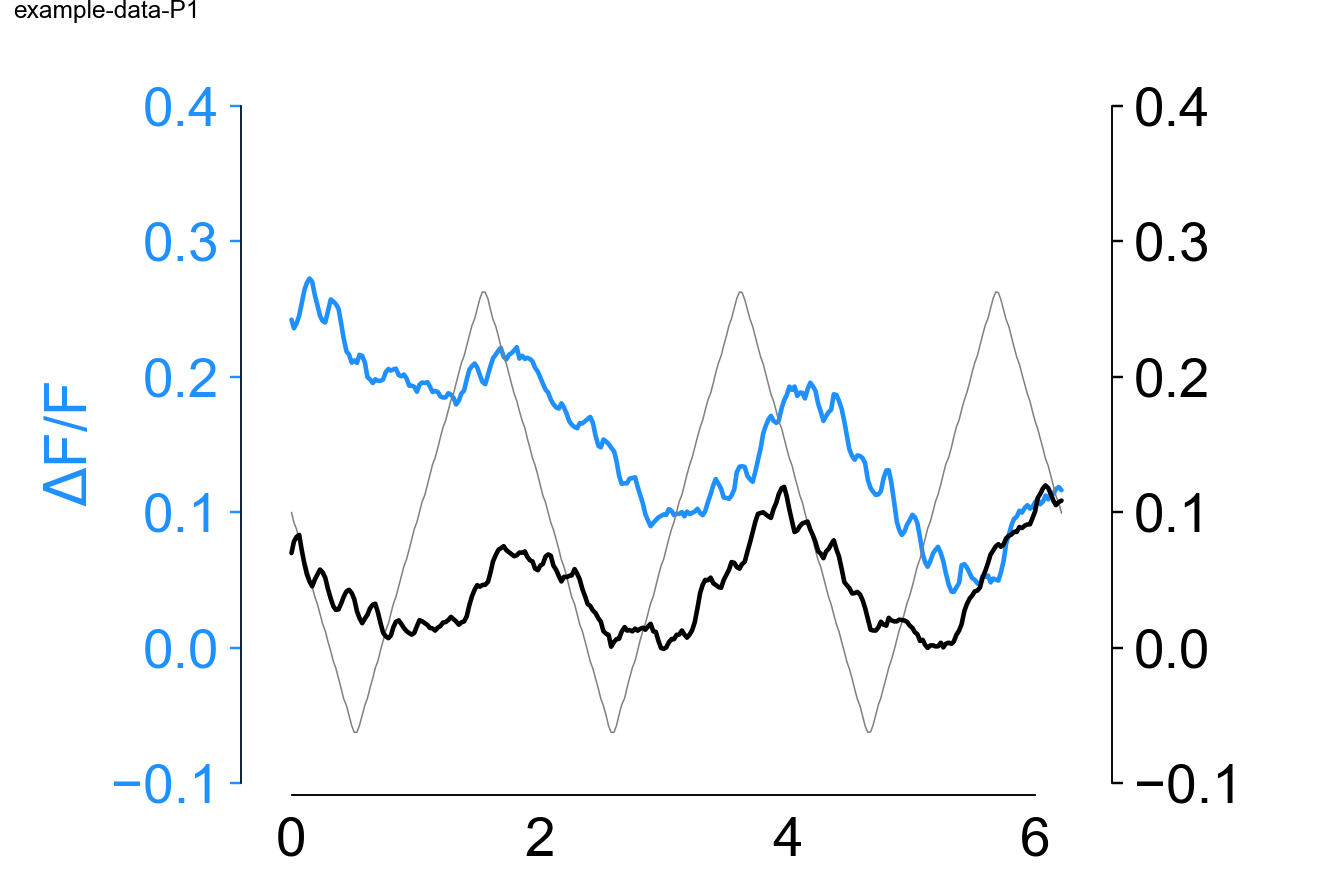

/Volumes/Julie/2p-data/examples/example-data-P1/figures/avg-trial-court-v-run_example-data-P1.svg


In [136]:
# mnCrt = mean(trialTC(crt,:))'; hold on;
# plot(mnTime, mnCrt,'
# tc_color = 'dodgerblue'
tc_color = cell_color
fig, ax =pl.subplots(sharey=True)
ax.plot(mdata['meantrial_time'], mdata['meantrial_tc_court'], tc_color)
ax.set_ylabel('$\Delta$F/F', color=tc_color)
ax.tick_params(axis='y', colors=tc_color)
ax.spines['left'].set_color(tc_color)

ax2 = ax.twinx()
offset = 0.1
ax2.plot(mdata['meantrial_time'], mdata['meantrial_female_angle']/4 + offset, 'gray', lw=0.5)
ax2.plot(mdata['meantrial_time'], mdata['meantrial_tc_run'], 'k')

ax2.spines['right'].set_color('k')

for ax in fig.axes:
    ax.set_ylim([-0.1, 0.4])

sns.despine(top=True, right=False, offset=4, trim=True)
ax.set_box_aspect(0.8)

putil.label_figure(fig, acq)
figname = 'avg-trial-court-v-run_{}'.format(acq)
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(os.path.join(figdir, '{}.svg'.format(figname)))

## Tom's neural-singing data

In [7]:
import pandas as pd

In [8]:
srcdir = '/Users/julianarhee/Documents/rutalab/projects/courtship/tom-data/splitP1-examples-wings'
fname = 'pooled_splitP1_soundPlayback_courting_v2.mat'
fpath = os.path.join(srcdir, fname)
mat = scipy.io.loadmat(fpath)

In [9]:
m = mat['store'][0]


In [10]:
mdtype

NameError: name 'mdtype' is not defined

In [11]:

struct_name = [k for k in mat.keys() if not k.startswith('__')]
assert len(struct_name)==1, "Did not find unique struct name: %s" % str(struct_name)
mdata = mat.get(struct_name[0])
print(struct_name)
# Use fields to create dict
# 'names' (1, 18)
# 'data' (n_frames, n_vars)
# 'units' (units of variables)
mdtype = mdata.dtype
ndata = {n: mdata[n][0] for n in mdtype.names}

columns = ndata.keys() #[n[0] for n in ndata['names'][0]]
#n_frames, n_vars = ndata[struct_name].shape
#print(n_frames, n_vars)

['store']


In [12]:
columns

dict_keys(['trackingIndex', 'maleSpeed', 'bTime', 'iTime', 'soundPulses', 'tc', 'soundOnset', 'date', 'fname', 'ficTracFrame', 'songTimes', 'flickTimes', 'binaryFlick', 'binarySong'])

In [13]:
behav_vars = ['trackingIndex', 'maleSpeed', 'bTime', 'binarySong', ]
trim = ['bTime', 'binarySong']
tc_vars = ['iTime', 'tc', ]
b_list=[]
t_list=[]
for i in range(len(ndata['trackingIndex'])):

    bdict = dict((c, ndata[c][i].squeeze()[1:]) if c in trim else \
           (c, ndata[c][i].squeeze()) for c in behav_vars)
    beh = pd.DataFrame(bdict)
    beh['acquisition'] = ndata['fname'][i][0]
    
    tcdict = dict((c, ndata[c][i].squeeze()) for c in tc_vars)
    tc = pd.DataFrame(tcdict)
    tc['acquisition'] = ndata['fname'][i][0]

    b_list.append(beh)
    t_list.append(tc)

In [14]:
beh = pd.concat(b_list)
print(beh.shape)
tc = pd.concat(t_list)
print(tc.shape)

(254510, 5)
(45881, 3)


In [15]:
ti_color='gray'
tc_color = 'dodgerblue'

In [16]:
tc_['iTime']

NameError: name 'tc_' is not defined

In [17]:
tc['dff'] = None
for acq, df_ in tc.groupby('acquisition'):
    bas_ = np.nanmean(df_[df_['iTime']<60]['tc'])
    dff_ = (df_['tc'] - bas_) / bas_
    tc.loc[tc['acquisition']==acq, 'dff'] = dff_
#tc = tc.reset_index()
tc['dff'] = tc['dff'].astype(float)

In [18]:
tc['dff'].min(), tc['dff'].max()

(-0.32205943440001844, 1.767252763256918)

In [19]:
# beh['trackingIndex']
q=24
bin_labels = np.arange(0, q)
tc['dff_quantile'] =  pd.cut(tc['dff'], bins=q) #q=q)
tc['dff_bin'] = pd.cut(tc['dff'], bins=q, labels=bin_labels) #, precision=0)

tc['dff_quant_left'] = [v.left for v in tc['dff_quantile']]
tc['dff_quant_right'] = [v.right for v in tc['dff_quantile']]

# fig, ax =pl.subplots()
# ax.plot(means['dff'])

In [20]:
beh['dff_bin'] = None
beh['dff_quant_left'] = None
beh['dff_quant_right'] = None
for (acq, b), t_ in tc.groupby(['acquisition', 'dff_bin']):
    tmin, tmax = t_['iTime'].min(), t_['iTime'].max()

    beh.loc[(beh['acquisition']==acq) & (beh['bTime']<=tmax) \
            & (beh['bTime']>=tmin), 'dff_bin'] = b
    beh.loc[(beh['acquisition']==acq) & (beh['bTime']<=tmax) \
            & (beh['bTime']>=tmin), 'dff_quant_left'] = t_['dff_quant_left'].unique()[0]
    beh.loc[(beh['acquisition']==acq) & (beh['bTime']<=tmax) \
            & (beh['bTime']>=tmin), 'dff_quant_right'] = t_['dff_quant_right'].unique()[0]
    

<IPython.core.display.Javascript object>


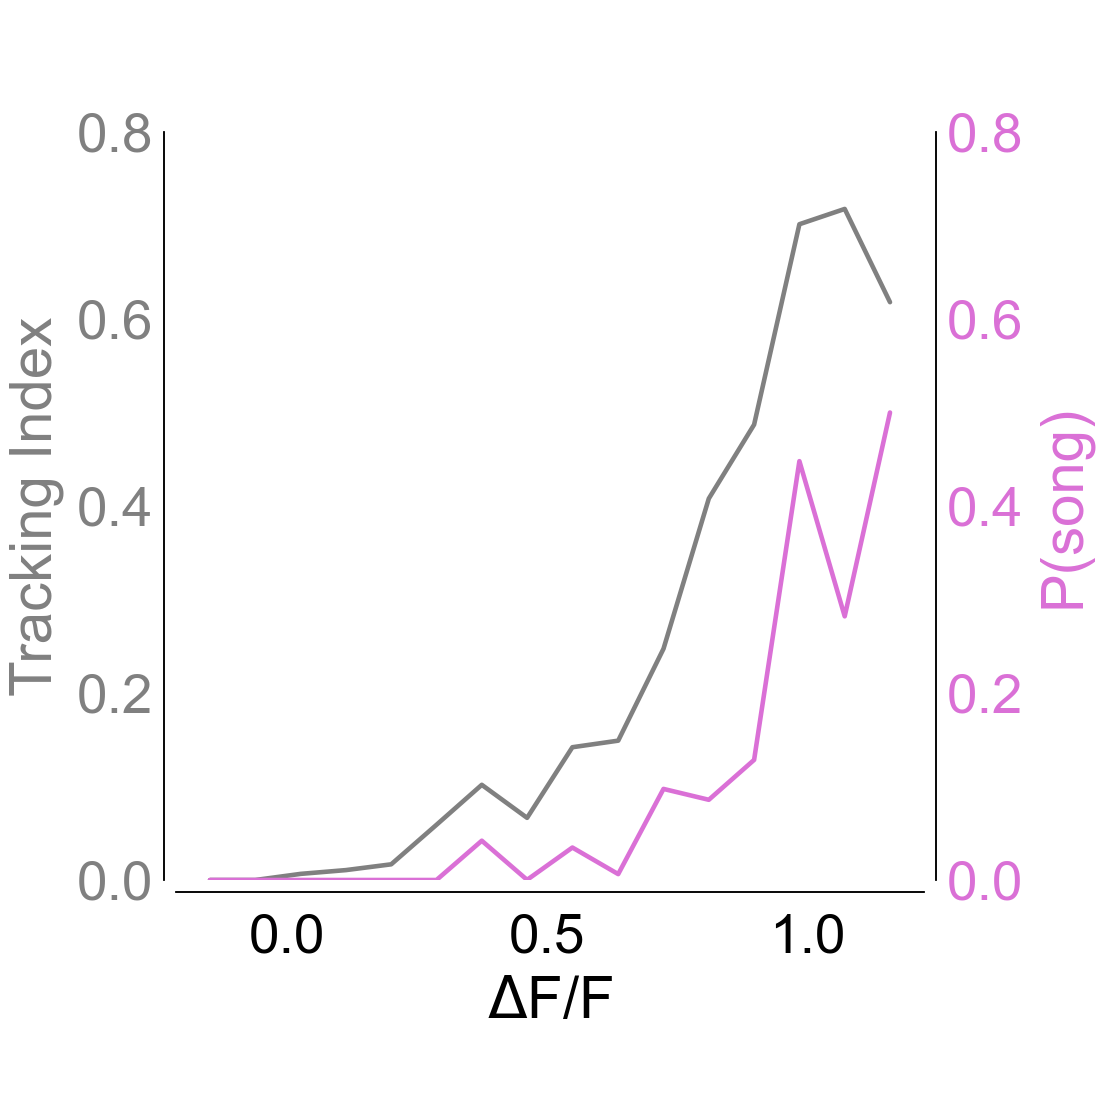

/Users/julianarhee/Documents/rutalab/projects/courtship/tom-data/splitP1-examples-wings/dff-bin24_TI_and_pSong.png


In [21]:
song_color = 'orchid'
ti_color = 'gray'

fig, ax1 = pl.subplots(figsize=(5,5))
xvar = 'dff_quant_right'
beh_means_acq = beh.groupby(['acquisition', xvar])[['binarySong', 'trackingIndex']].mean().reset_index()
beh_means = beh_means_acq.groupby(xvar)[['binarySong', 'trackingIndex']].mean().reset_index()
beh_sem = beh_means_acq.groupby([xvar])[['binarySong', 'trackingIndex']].std().reset_index()

plot_means = beh_means.loc[0:15]
plot_sem = beh_sem.loc[0:15]

ax1.plot(plot_means[xvar], plot_means['trackingIndex'], color=ti_color)
ax1.tick_params(axis='y', size=0, labelcolor=ti_color)
ax1.set_ylabel('Tracking Index', color=ti_color)
ax1.set_xlabel('$\Delta$F/F')
ax2 = ax1.twinx() 
ax2.plot(plot_means[xvar], plot_means['binarySong'], color=song_color)
ax2.tick_params(axis='y', size=0, labelcolor=song_color)
ax2.set_ylabel("P(song)", color=song_color)

for ax in fig.axes:
    ax.set_ylim([0, 0.8])
    ax.set_box_aspect(1)
pl.subplots_adjust(bottom=0.2, right=0.9, left=0.1)
sns.despine(right=False, offset=4)
# ax.fill_between(plot_means['dff_bin'], 
#                 plot_means['binarySong']+plot_sem['binarySong'], 
#                 plot_means['binarySong']-plot_sem['binarySong'], alpha=0.5)

figname = 'dff-bin{}_TI_and_pSong'.format(q)
pl.savefig(os.path.join(srcdir, '{}.png'.format(figname)))
pl.savefig(os.path.join(srcdir, '{}.svg'.format(figname)))

print(os.path.join(srcdir, '{}.png'.format(figname)))

<IPython.core.display.Javascript object>


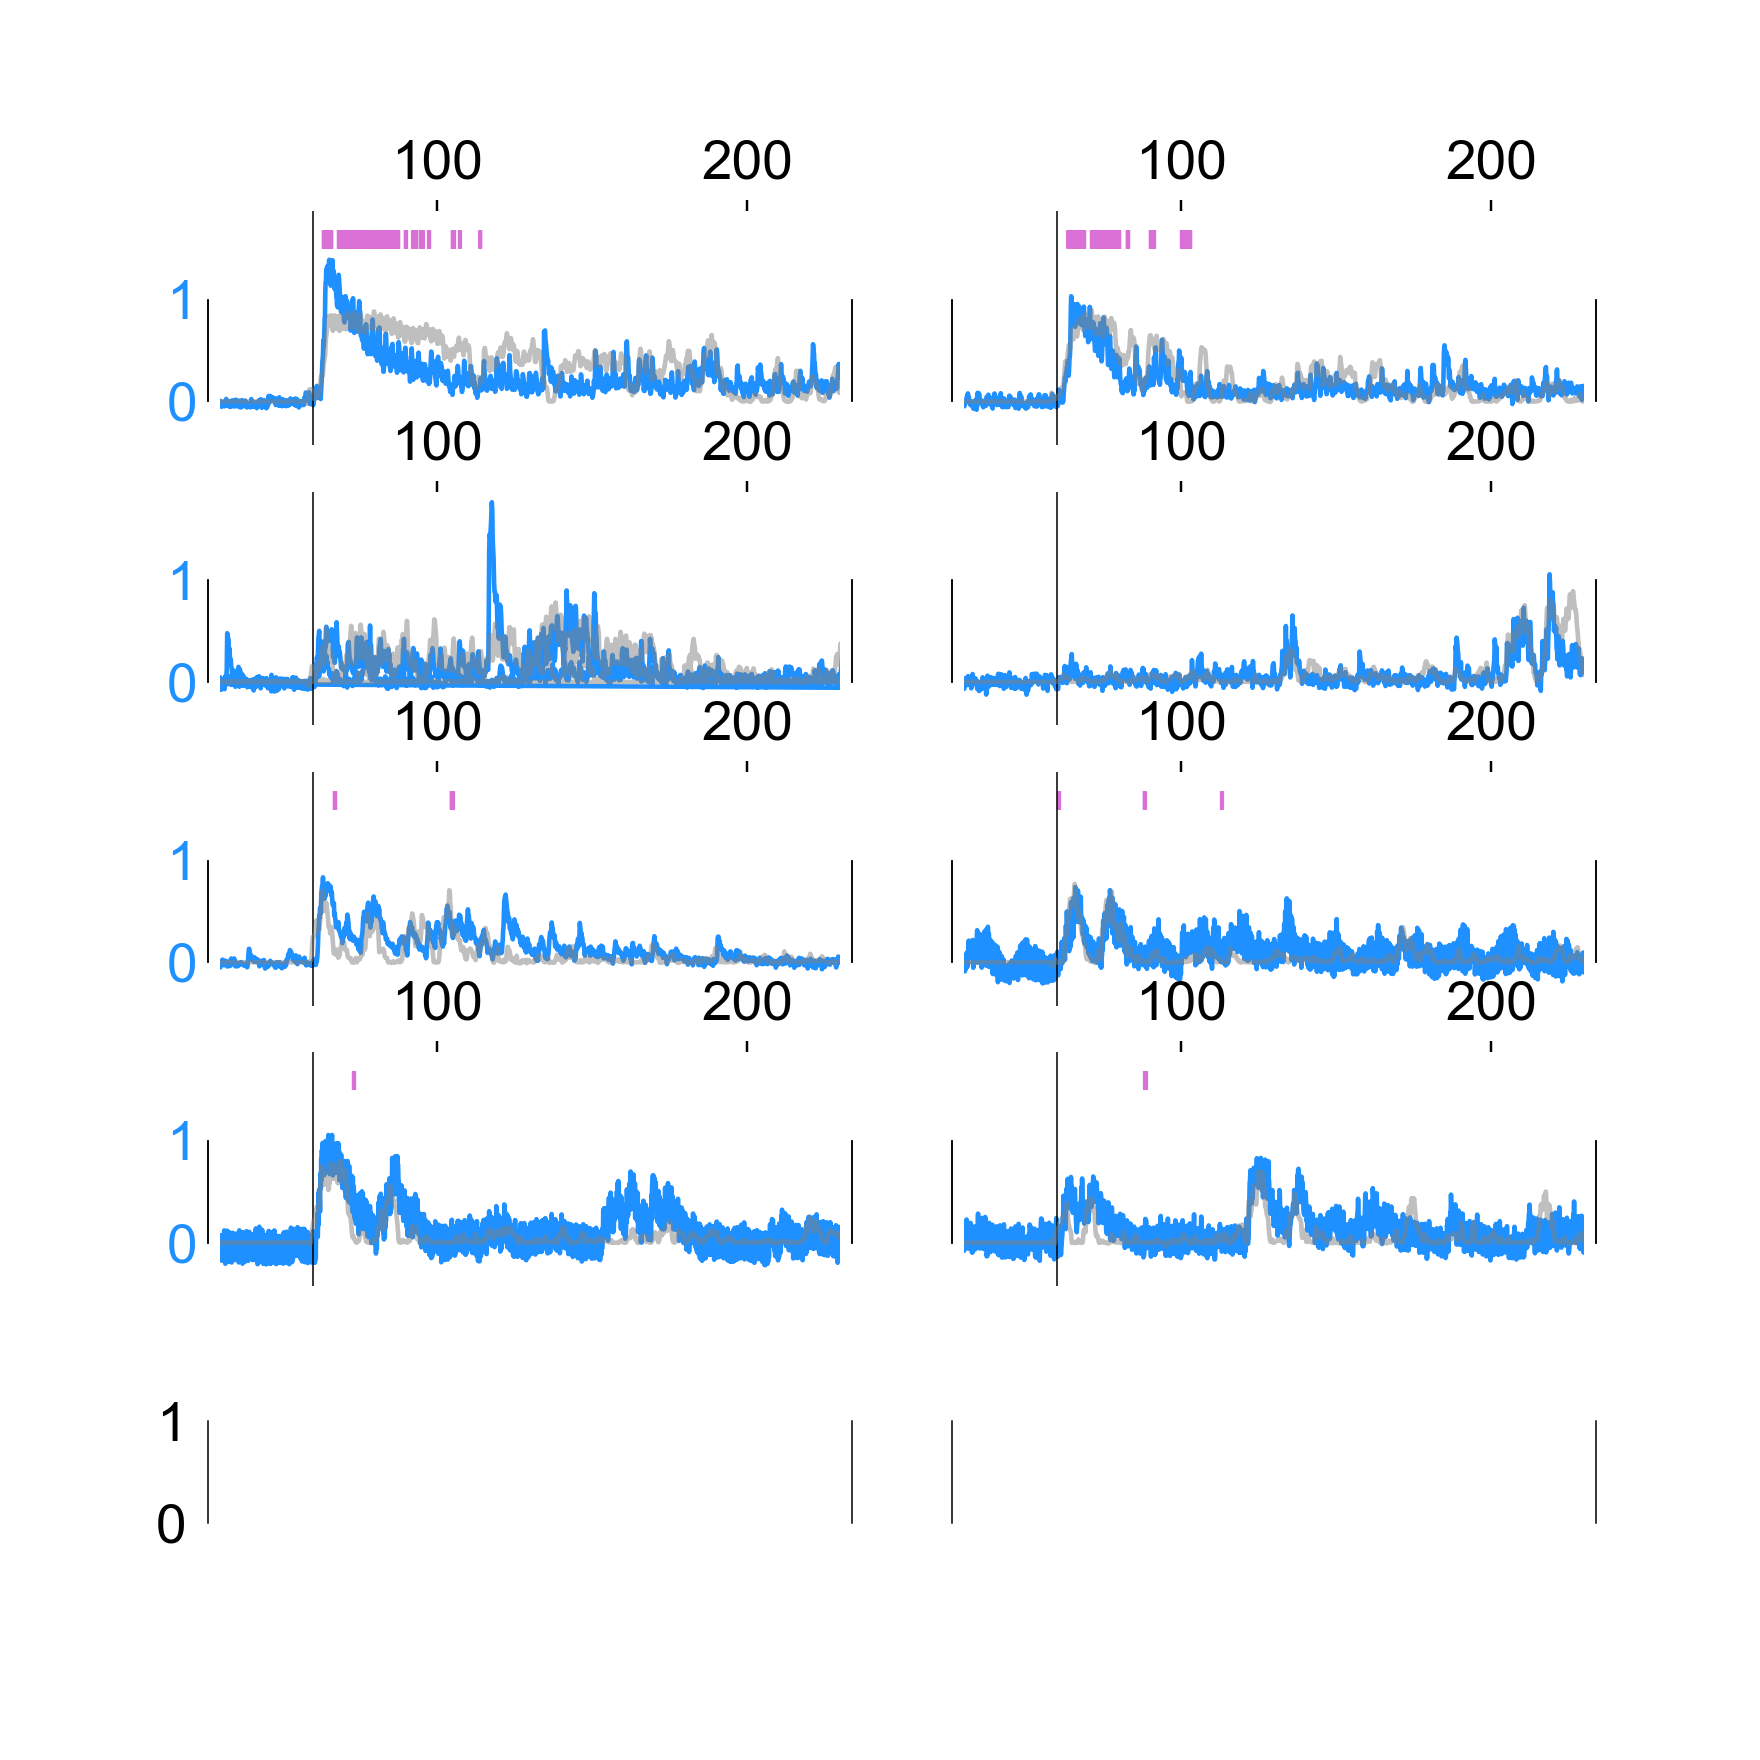

0.0668171
0.0631753
0.1198036
0.0677147
0.065612
0.0713363
0.0625455
0.084091
/Users/julianarhee/Documents/rutalab/projects/courtship/tom-data/splitP1-examples-wings/traces_TI_and_pSong.png


In [22]:

fig, axn = pl.subplots(5, 2, sharex=True, sharey=True, figsize=(8,8))
for ai, (acq, df_) in enumerate(beh.groupby('acquisition')):

    ax1=axn.flat[ai]
    b_start = df_['bTime'].iloc[0]
    print(b_start)
    tc_ = tc[(tc['acquisition']==acq) & (tc['iTime']>=b_start)]

    ax1.plot(tc_['iTime'], tc_['dff'], color=tc_color)
    song_vals = df_['binarySong'].copy()
    song_vals[song_vals==0] = np.nan
    offset=0.6
    ax1.plot(df_['bTime'], song_vals+offset, lw=0, marker='|', color=song_color)
    ax1.tick_params(axis='y', size=0, labelcolor=tc_color)
    ax1.axvline(b_start+60, lw=0.5, color='k')
    ax1.set_xlim([30, 30+200])
    ax2 = ax1.twiny()
    ax2.plot(df_['bTime'], df_['trackingIndex'], color=ti_color, alpha=0.5)
    ax2.tick_params(axis='y', size=0, labelcolor=ti_color)
    ax2.set_xlim([30, 30+200])
    
sns.despine(right=False, top=True, bottom=True, offset=4, trim=True)
for ax in axn.flat:
    ax.tick_params(axis='x', size=0) #, labelcolor=ti_color)
    ax.set_xticklabels([])
    ax.set_xticks([])
    
    

figname = 'traces_TI_and_pSong'
pl.savefig(os.path.join(srcdir, '{}.png'.format(figname)))
pl.savefig(os.path.join(srcdir, '{}.svg'.format(figname)))

print(os.path.join(srcdir, '{}.png'.format(figname)))